# BT4012 Project: Sampling Original Dataset
### Completed by: Group 8

## Imports and Configurations

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

pd.set_option('display.max_columns', None)

## Loading Data

In [2]:
train_df = pd.read_csv('../data/raw/fraudTrain.csv')
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
test_df = pd.read_csv('../data/raw/fraudTest.csv')
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Plot label distribution

In [4]:
def plot_class_distribution(df, dataset_name):
    """
    Plots the class distribution of the 'is_fraud' column and prints the counts of each class.
    
    Parameters:
    - df (pd.DataFrame): The dataset to plot.
    - dataset_name (str): The name of the dataset (for labeling purposes).
    """
    # Count the occurrences of each class
    class_counts = df['is_fraud'].value_counts()
    
    # Print the counts of each class
    print(f'Class counts for {dataset_name}:')
    print(f'Non-Fraud (0): {class_counts.get(0, 0)}')
    print(f'Fraud (1): {class_counts.get(1, 0)}\n')
    
    # Plotting the class distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='is_fraud', data=df, palette='Set1')
    plt.title(f'{dataset_name} - Class Distribution')
    plt.xlabel('Fraud (1) vs Non-Fraud (0)')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
    plt.show()

Class counts for Training Set:
Non-Fraud (0): 1289169
Fraud (1): 7506



/var/folders/v9/xxt1lxd130x54q861t544fdw0000gn/T/ipykernel_22365/4225395280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='Set1')


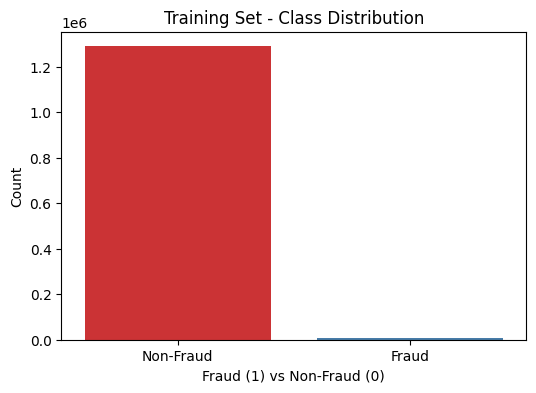

In [5]:
# Plot the distribution for the training set
plot_class_distribution(train_df, "Training Set")

Class counts for Test Set:
Non-Fraud (0): 553574
Fraud (1): 2145



/var/folders/v9/xxt1lxd130x54q861t544fdw0000gn/T/ipykernel_22365/4225395280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='Set1')


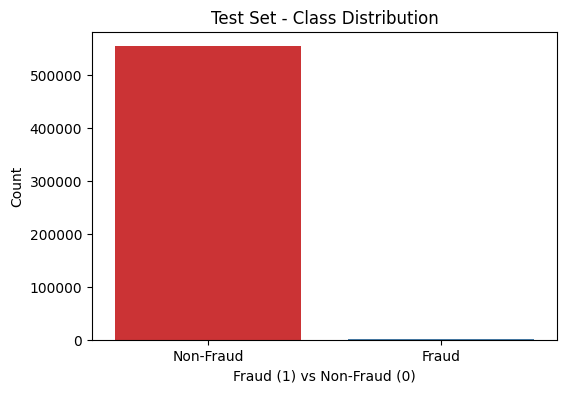

In [6]:
plot_class_distribution(test_df, "Test Set")

## Split into train/test/validation sets

In [7]:
def create_train_val_test_splits(train_df, test_df, total_rows, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """
    Split the datasets into train, validation, and test sets based on the specified total number of rows
    and the desired train, validation, and test ratios.
    
    Parameters:
    - train_df (pd.DataFrame): The original training dataset.
    - test_df (pd.DataFrame): The original test dataset.
    - total_rows (int): The total number of rows you want after the split.
    - train_ratio (float): Proportion of data for the training set.
    - val_ratio (float): Proportion of data for the validation set.
    - test_ratio (float): Proportion of data for the test set.
    
    Returns:
    - train_undersampled (pd.DataFrame): The undersampled training set.
    - validation_df (pd.DataFrame): The validation set.
    - test_df_downsampled (pd.DataFrame): The test set.
    """
    
    # Ensure that the ratios sum to 1
    assert (train_ratio + val_ratio + test_ratio) == 1, "Ratios must sum up to 1."
    
    # Calculate the number of rows for each set
    num_train_rows = int(total_rows * train_ratio)
    num_val_rows = int(total_rows * val_ratio)
    num_test_rows = int(total_rows * test_ratio)
    
    print(f"Total rows: {total_rows}")
    print(f"Train rows: {num_train_rows}")
    print(f"Validation rows: {num_val_rows}")
    print(f"Test rows: {num_test_rows}")
    print("\n")
    
    # ------------------------------- 1) Validation Data -------------------------------
    # Stratified sampling for the validation set from the training dataset. Ensures that the class distribution is the same in the original dataset
    validation_df, remaining_train_df = train_test_split(
        train_df, test_size=(len(train_df) - num_val_rows) / len(train_df),
        stratify=train_df['is_fraud'], random_state=RANDOM_STATE
    )
    
    # ------------------------------- 2) Train Data -------------------------------
    # Undersample the remaining training data to get the required number of training rows (num_train_rows)
    fraud_df = remaining_train_df[remaining_train_df['is_fraud'] == 1]
    non_fraud_df = remaining_train_df[remaining_train_df['is_fraud'] == 0]
    
    # Calculate the number of fraud and non-fraud samples to maintain a 50:50 balance
    n_fraud = len(fraud_df)
    n_non_fraud = num_train_rows - n_fraud  # The rest should be non-fraud
    
    # Undersample the non-fraud class
    non_fraud_undersampled = resample(non_fraud_df,
                                      replace=False,  # sample without replacement
                                      n_samples=n_non_fraud,  # target the desired number of non-fraud samples
                                      random_state=RANDOM_STATE)
    
    # Combine the undersampled non-fraud with the fraud samples
    train_undersampled = pd.concat([fraud_df, non_fraud_undersampled])
    
    # Shuffle the new training set
    train_undersampled = train_undersampled.sample(frac=1, random_state=RANDOM_STATE)
    
    # ------------------------------- 3) Test Data -------------------------------
    # Stratified sampling for the test set to get the required number of rows (num_test_rows)
    test_df_downsampled, _ = train_test_split(
        test_df, test_size=(len(test_df) - num_test_rows) / len(test_df),
        stratify=test_df['is_fraud'], random_state=RANDOM_STATE
    )
    
    # Ensure no data leakage by checking if there's any overlap between train, validation, and test sets
    # Merge by index column "Unnamed"
    train_val_overlap = pd.merge(train_undersampled, validation_df, how='inner', on=['Unnamed: 0'])    
    assert len(train_val_overlap) == 0, "Data leakage detected between training and validation sets"

    # train_test_overlap = pd.merge(train_undersampled, test_df_downsampled, how='inner', on=['Unnamed: 0'])
    # assert len(train_test_overlap) == 0, "Data leakage detected between training and test sets"
    
    print(f"Final Train Set Size: {train_undersampled.shape[0]}")
    print(f"Final Validation Set Size: {validation_df.shape[0]}")
    print(f"Final Test Set Size: {test_df_downsampled.shape[0]}")
    
    return train_undersampled, validation_df, test_df_downsampled



total_rows = 300000
train_undersampled, validation_df, test_df_downsampled = create_train_val_test_splits(train_df, test_df, total_rows)


Total rows: 300000
Train rows: 240000
Validation rows: 30000
Test rows: 30000


Final Train Set Size: 240000
Final Validation Set Size: 30000
Final Test Set Size: 30000


Class counts for Sampled Training Set:
Non-Fraud (0): 232668
Fraud (1): 7332



/var/folders/v9/xxt1lxd130x54q861t544fdw0000gn/T/ipykernel_22365/4225395280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='Set1')


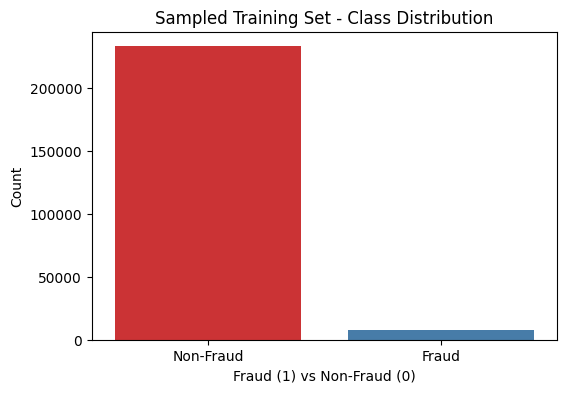

In [8]:
# Plot the distribution for the sampled training set
plot_class_distribution(train_undersampled, "Sampled Training Set")

/var/folders/v9/xxt1lxd130x54q861t544fdw0000gn/T/ipykernel_22365/4225395280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='Set1')


Class counts for Sampled Validation Set:
Non-Fraud (0): 29826
Fraud (1): 174



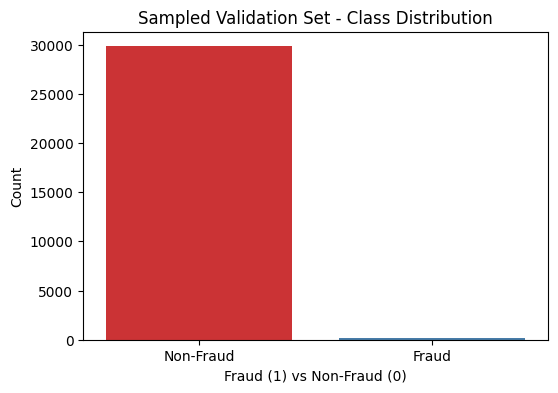

In [9]:
plot_class_distribution(validation_df, "Sampled Validation Set")

Class counts for Sampled Test Set:
Non-Fraud (0): 29884
Fraud (1): 116



/var/folders/v9/xxt1lxd130x54q861t544fdw0000gn/T/ipykernel_22365/4225395280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='Set1')


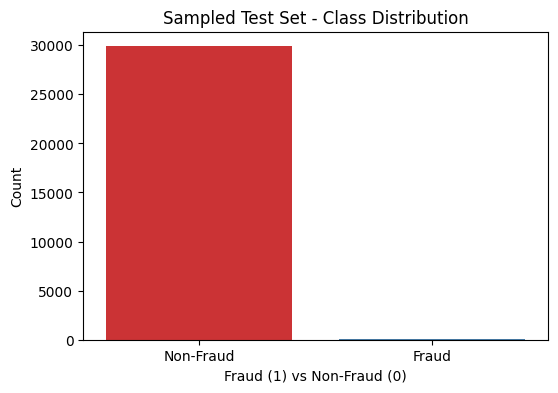

In [10]:
plot_class_distribution(test_df_downsampled, "Sampled Test Set")

Saving Datasets

In [11]:
import os

# Define the folder path where you want to save the processed files
output_folder = "../data/preliminary/"

# Ensure the folder exists, create if not
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save each DataFrame to CSV
train_undersampled.to_csv(os.path.join(output_folder, "train.csv"), index=False)
validation_df.to_csv(os.path.join(output_folder, "validation.csv"), index=False)
test_df_downsampled.to_csv(os.path.join(output_folder, "test.csv"), index=False)

print(f"Files saved to {output_folder}")


Files saved to ../data/preliminary/
